## Problem Statement
Recent Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.
This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning.
Suppose you have been hired as Data Scientist of HealthMan – a not for profit organization dedicated to manage the functioning of Hospitals in a professional and optimal manner.
The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.

#### Data Description
traindata.csv – File containing features related to patient, hospital and Length of stay on case basis traindata_dictonary.csv – File containing the information of the features in train file
Test Set
testdata.csv – File containing features related to patient, hospital. Need to predict the Length of stay for each caseid
Sample Submission:
case_id: Unique id for each case
Stay: Length of stay for the patient w.r.t each case id in test data

#### Evaluation Metric
The evaluation metric for this hackathon is 100*Accuracy Score.
Acknowledgements
More details can be found on Analytics Vidhya website who conducted the hackathon.
https://datahack.analyticsvidhya.com/contest/janatahack-healthcare-analytics-ii/#ProblemStatement



# EDA and visualization

In [2]:
#Importing lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

C:\Users\Renuka DJ\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data=pd.read_csv('train_data.csv')  #reading the dataset

In [4]:
data.shape

(318438, 18)

318438 are rows and 18 colunms present in the dataset

In [5]:
data.head()  #checking first 5 rows of dataset

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [6]:
unique=pd.DataFrame(data.nunique(),columns=['Unique_values'])
unique

,Unique_values
case_id,318438
Hospital_code,32
Hospital_type_code,7
City_Code_Hospital,11
Hospital_region_code,3
Available Extra Rooms in Hospital,18
Department,5
Ward_Type,6
Ward_Facility_Code,6
Bed Grade,4


In [7]:
data.info()     #checking the datatypes of all col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

We can see the most of columns are object variables.

Hospital_type_code , Hospital_region_code ,  Department ,Ward_Type,Ward_Facility_Code ,Type of Admission,Severity of Illness ,Age ,Stay  are categorical variables.

case_id, Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade  , patientid ,City_Code_Patient,Visitors with Patient,Admission_Deposit are numerical variables.

In [8]:
data.describe()  #checking statistical description for numerical data

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


We can  see mean of Admission deposite is 4880.79,standard deviation is 1086.

This also describe the 25%,50%,75% quantile of the data with mean and maximum value of each colunm.

We can drop case_id as it has unique value for each row. No effective column for model building

In [9]:
data=data.drop('case_id',axis=1)

In [10]:
data.select_dtypes(['object'])   #checking data which has datatype as object(categorical data)

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,Stay
0,c,Z,radiotherapy,R,F,Emergency,Extreme,51-60,0-10
1,c,Z,radiotherapy,S,F,Trauma,Extreme,51-60,41-50
2,e,X,anesthesia,S,E,Trauma,Extreme,51-60,31-40
3,b,Y,radiotherapy,R,D,Trauma,Extreme,51-60,41-50
4,b,Y,radiotherapy,S,D,Trauma,Extreme,51-60,41-50
...,...,...,...,...,...,...,...,...,...
318433,a,X,radiotherapy,Q,F,Emergency,Moderate,41-50,11-20
318434,a,X,anesthesia,Q,E,Urgent,Moderate,81-90,31-40
318435,a,X,gynecology,R,F,Emergency,Minor,71-80,11-20
318436,b,Y,anesthesia,Q,D,Trauma,Minor,11-20,11-20


In [11]:
#Checking the values in each object variable
for i in data.select_dtypes(['object']):
    print(i)
    print(data[i].value_counts())
    print('no of different values',data[i].value_counts().count())
    print('-----------------------------------------------------------------')


Hospital_type_code
a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64
no of different values 7
-----------------------------------------------------------------
Hospital_region_code
X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64
no of different values 3
-----------------------------------------------------------------
Department
gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64
no of different values 5
-----------------------------------------------------------------
Ward_Type
R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64
no of different values 6
-----------------------------------------------------------------
Ward_Facility_Code
F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: 

Above we can see Hospital_type_code has 7 different values in col.
Hospital_region_code has 3, Department has 5,Ward_Type are 6,Ward_Facility_Code are 6,
Type of Admission has 3, Severity of Illness 3, Age has 10 and stay has 11 different types in col.



Lets check null values in dataset::

In [12]:
missing=pd.DataFrame(data.isna().sum(), columns=['Missing_count'])
missing['Missing_percent']=round((missing['Missing_count']/len(data))*100,2)
missing


,Missing_count,Missing_percent
Hospital_code,0,0.00
Hospital_type_code,0,0.00
City_Code_Hospital,0,0.00
Hospital_region_code,0,0.00
Available Extra Rooms in Hospital,0,0.00
Department,0,0.00
Ward_Type,0,0.00
Ward_Facility_Code,0,0.00
Bed Grade,113,0.04
patientid,0,0.00


We can see only Bed Grade ,City_Code_Patient has null values.

In [13]:
print('% of Null values in Bed Grade',data['Bed Grade'].isna().sum()/len(data['Bed Grade'])*100)
print('% of Null values in City_Code_Patient',data['City_Code_Patient'].isna().sum()/len(data['City_Code_Patient'])*100)

% of Null values in Bed Grade 0.035485714644609
% of Null values in City_Code_Patient 1.4231969802598936


Here we can see that really less data is missing from dataset so we can drop these rows from dataset. Otherwise we treat the null values with mode or median.

In [14]:
data=data.dropna()     # dropping null values.

In [15]:
data.shape         # checking shape of the dataset

(313793, 17)

Here in dataset the 'Stay' colunm is dependant colunm. So lets check the spread of data with Patient count.

In [16]:
data['Stay'].value_counts()

21-30                 86316
11-20                 77095
31-40                 54312
51-60                 34463
0-10                  23250
41-50                 11541
71-80                 10096
More than 100 Days     6548
81-90                  4761
91-100                 2713
61-70                  2698
Name: Stay, dtype: int64

Lets check visiual representation.

Text(0.5, 1.0, 'Patient count by length of stay')

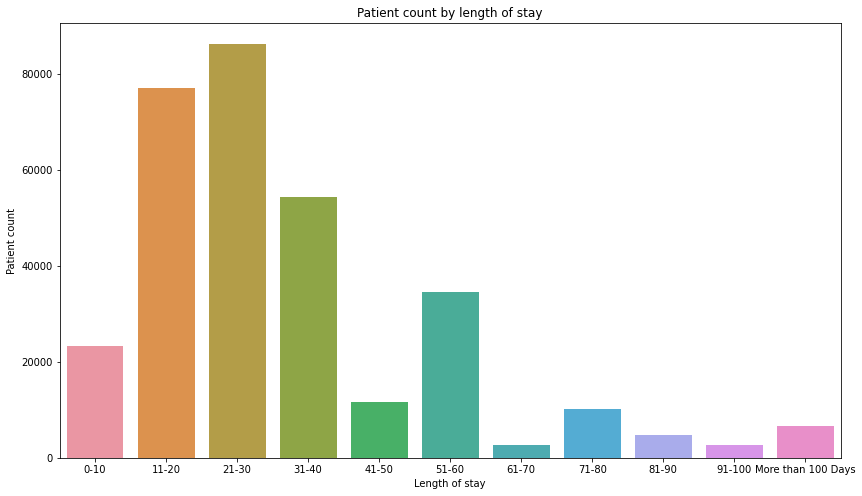

In [17]:
plt.figure(figsize=(14,8))
sns.countplot(data['Stay'].sort_values())
plt.xlabel("Length of stay")
plt.ylabel("Patient count")
plt.title("Patient count by length of stay")

Here we can see the maximum length of stay is 21 to 30 days followed by 11 to 20.

Here we can check 'More than 100 days' has really less number of the data so lets check % of Length of stay which is more than 100 days.

In [18]:
data[data['Stay']=='More than 100 Days'].shape[0]  # no of people who stayed more than 100 days

6548

In [19]:
print('% of people stayed in hospital for more than 100 day.',(data[data['Stay']=='More than 100 Days'].shape[0]/data.shape[0])*100)

% of people stayed in hospital for more than 100 day. 2.086725962656911


So 2.08 % od people stayed in hospital for more than 100 days. Very less number of patients stayed in hospital for more than 100 days.

Lets check the who are those patients.

In [20]:
more_tyan_100=data[data['Stay']=='More than 100 Days'][['Age','Severity of Illness','Type of Admission','Department']]
more_tyan_100.head(2)

,Age,Severity of Illness,Type of Admission,Department
45,31-40,Moderate,Emergency,gynecology
90,21-30,Moderate,Urgent,radiotherapy


In [21]:
more_tyan_100['Age'].value_counts(normalize=True)*100

41-50     19.303604
51-60     18.005498
71-80     16.020159
31-40     14.660965
61-70     13.240684
21-30      8.185706
81-90      4.871717
11-20      3.130727
0-10       1.679902
91-100     0.901038
Name: Age, dtype: float64

In [22]:
#pip install dexplot

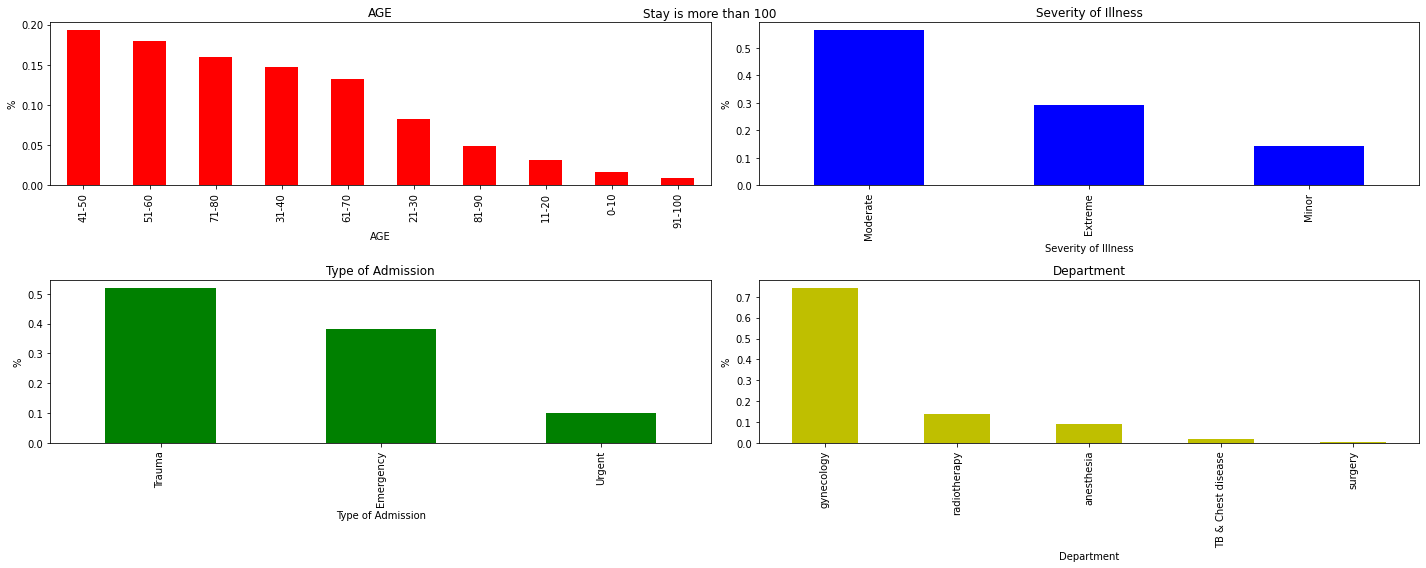

In [23]:
fig, axs = plt.subplots(2, 2,figsize=(20,8),tight_layout=3.0)

more_tyan_100['Age'].value_counts(normalize=True).plot(kind='bar',ax=axs[0,0],color='r')
more_tyan_100['Severity of Illness'].value_counts(normalize=True).plot(kind='bar',ax=axs[0,1],color='b')
more_tyan_100['Type of Admission'].value_counts(normalize=True).plot(kind='bar',ax=axs[1,0],color='g')
more_tyan_100['Department'].value_counts(normalize=True).plot(kind='bar',ax=axs[1,1],color='y')
axs[0,0].title.set_text('AGE')
axs[0,1].title.set_text('Severity of Illness')
axs[1,0].title.set_text('Type of Admission')
axs[1,1].title.set_text('Department')

axs[0,0].set(xlabel="AGE",ylabel="%")
axs[0,1].set(xlabel="Severity of Illness",ylabel="%")
axs[1,0].set(xlabel="Type of Admission",ylabel="%")
axs[1,1].set(xlabel="Department",ylabel="%")

plt.suptitle('Stay is more than 100')

plt.show()


The Age for patients who stayed more tha 100 days are mostly 41 to 50 followed by 51 to 60.

The severity of illness is moderate for patient.

Gynecology is department where most of patients where admitted who stayed for more than 100 days.

Lets check spread of data for patients who stayed for less than 100 days

In [24]:
print('% of people stayed in hospital for less than 100 day.',(data[data['Stay']!='More than 100 Days'].shape[0]/data.shape[0])*100)

% of people stayed in hospital for less than 100 day. 97.91327403734309


97% of patients stayed in hospital for less than 100 days

In [25]:
less_tyan_100=data[data['Stay']!='More than 100 Days'][['Age','Severity of Illness','Type of Admission','Department']]

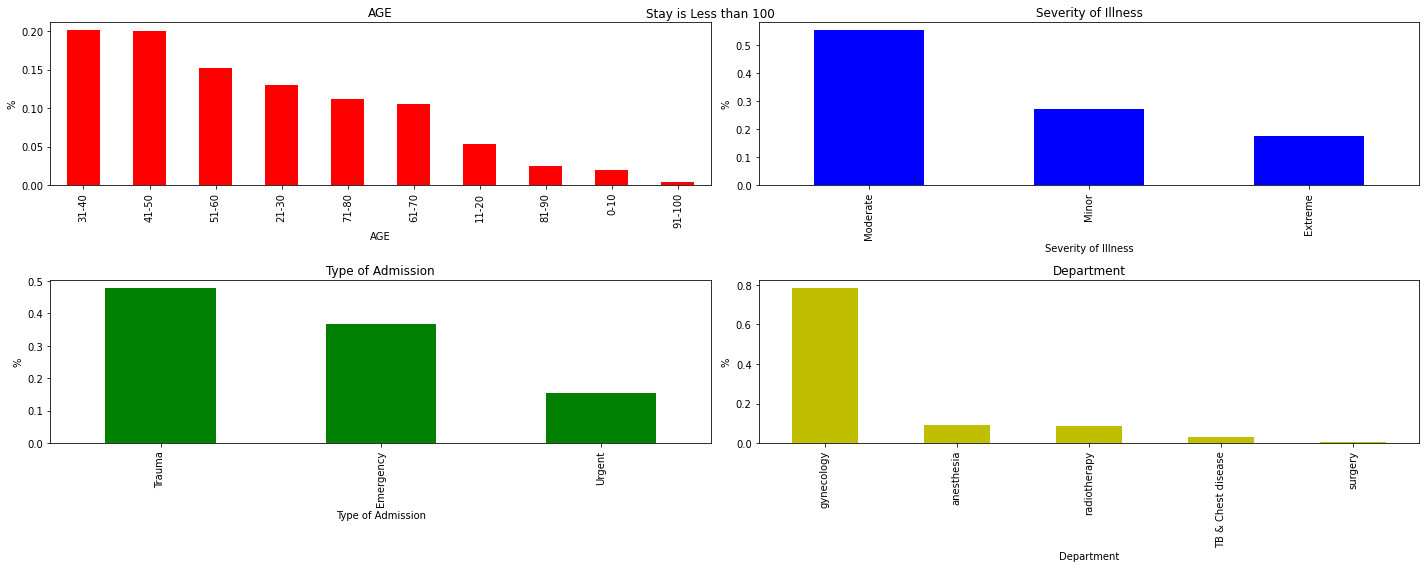

In [26]:
fig, axs = plt.subplots(2, 2,figsize=(20,8),tight_layout=3.0)

less_tyan_100['Age'].value_counts(normalize=True).plot(kind='bar',ax=axs[0,0],color='r')
less_tyan_100['Severity of Illness'].value_counts(normalize=True).plot(kind='bar',ax=axs[0,1],color='b')
less_tyan_100['Type of Admission'].value_counts(normalize=True).plot(kind='bar',ax=axs[1,0],color='g')
less_tyan_100['Department'].value_counts(normalize=True).plot(kind='bar',ax=axs[1,1],color='y')
axs[0,0].title.set_text('AGE')
axs[0,1].title.set_text('Severity of Illness')
axs[1,0].title.set_text('Type of Admission')
axs[1,1].title.set_text('Department')

axs[0,0].set(xlabel="AGE",ylabel="%")
axs[0,1].set(xlabel="Severity of Illness",ylabel="%")
axs[1,0].set(xlabel="Type of Admission",ylabel="%")
axs[1,1].set(xlabel="Department",ylabel="%")

plt.suptitle('Stay is Less than 100')
plt.show()


Here we can see patients who stayed less than 100 days has age between 31 to 50 years.

Severity of illness is Moderate.

Truma is type of admission for those patients.

Again the gynocology is department which has more number of patients than other.


Now lets check why gynecology department has more number of data in both cases.

In [27]:
data.groupby('Department').count()['Stay']

Department
TB & Chest disease      9460
anesthesia             29187
gynecology            245850
radiotherapy           28153
surgery                 1143
Name: Stay, dtype: int64

In [28]:
print(f"We observe that majority, i.e. {round((249486/len(data))*100,2)}%s cases from the entire data belong the Gynecology department.")

We observe that majority, i.e. 79.51%s cases from the entire data belong the Gynecology department.


so here we can see the gynecology has 245850 count of patients.

Here we can check with out gynecology  so we will able to understant what is spread of data amoung other departments and how it is impacting the stay.

In [29]:
data_withoutgynecology=data[~(data.Department=="gynecology")]  # creating dataframe without gynecology department.

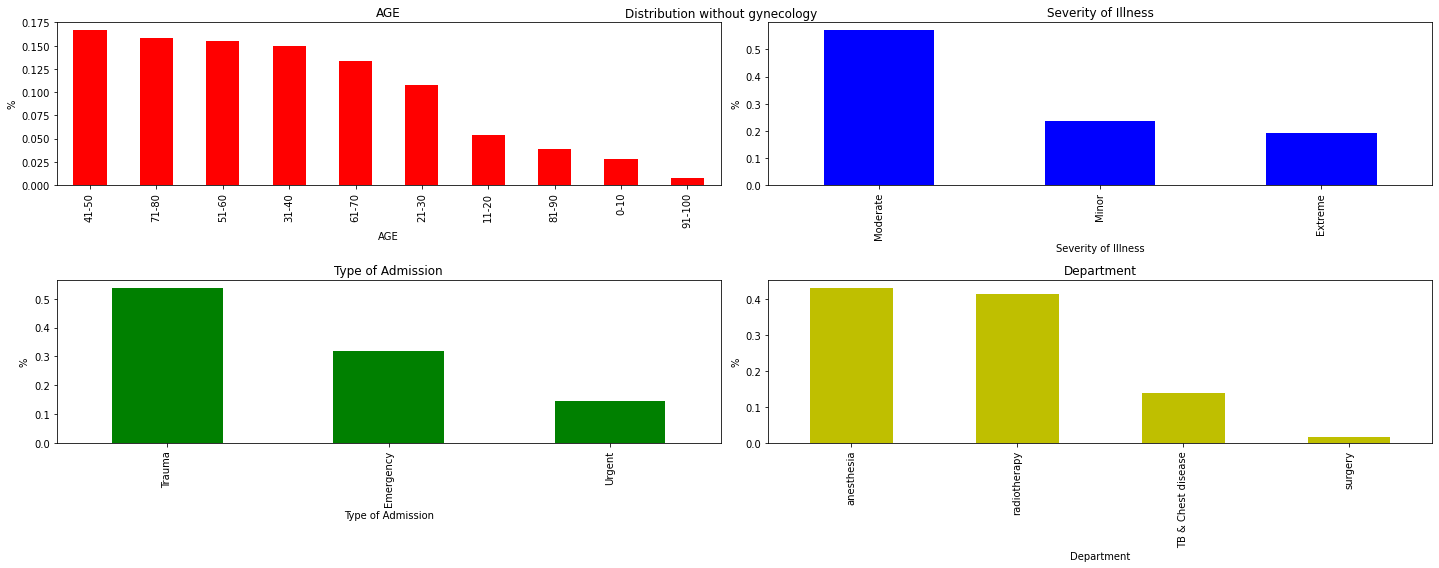

In [30]:
fig, axs = plt.subplots(2, 2,figsize=(20,8),tight_layout=3.0)

data_withoutgynecology['Age'].value_counts(normalize=True).plot(kind='bar',ax=axs[0,0],color='r')
data_withoutgynecology['Severity of Illness'].value_counts(normalize=True).plot(kind='bar',ax=axs[0,1],color='b')
data_withoutgynecology['Type of Admission'].value_counts(normalize=True).plot(kind='bar',ax=axs[1,0],color='g')
data_withoutgynecology['Department'].value_counts(normalize=True).plot(kind='bar',ax=axs[1,1],color='y')
axs[0,0].title.set_text('AGE')
axs[0,1].title.set_text('Severity of Illness')
axs[1,0].title.set_text('Type of Admission')
axs[1,1].title.set_text('Department')

axs[0,0].set(xlabel="AGE",ylabel="%")
axs[0,1].set(xlabel="Severity of Illness",ylabel="%")
axs[1,0].set(xlabel="Type of Admission",ylabel="%")
axs[1,1].set(xlabel="Department",ylabel="%")

plt.suptitle('Distribution without gynecology ')
plt.show()


Here we are checking the dataset with out gynecology departmet.

We can see Age is 41-50 followed by 51-60,71-80.

Moderate is illness type which been admitted to other departments.

Trauma is type of Admission for patients.

After gynecology anesthesia followed by radiotherapy has more number of patients.

Checking age for patients in gynecology department::

Text(0.5, 1.0, 'Age of patients in gynecology department')

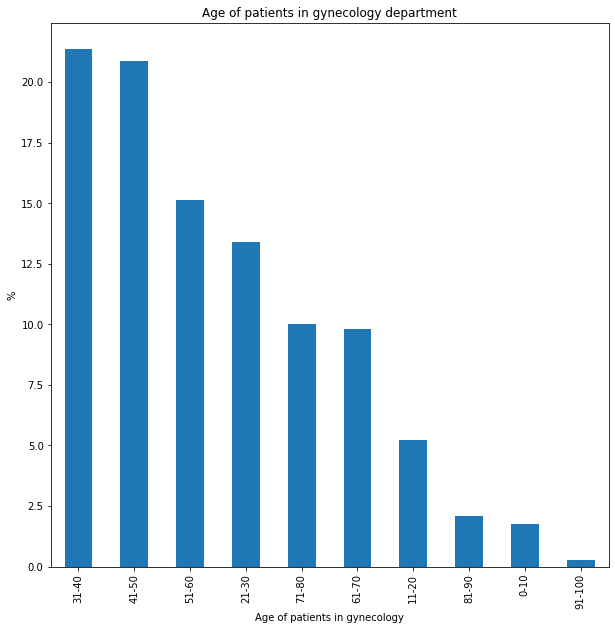

In [31]:
(data[data['Department']=='gynecology']['Age'].value_counts(normalize=True)*100).plot(kind='bar',figsize=(10,10))
plt.xlabel('Age of patients in gynecology')
plt.ylabel('%')
plt.title('Age of patients in gynecology department')

We can see 31 to 50 years is age for patients in gynecology department.

Lets check for Severity of illness :

Text(0.5, 1.0, '% distribution of Severity of Illness')

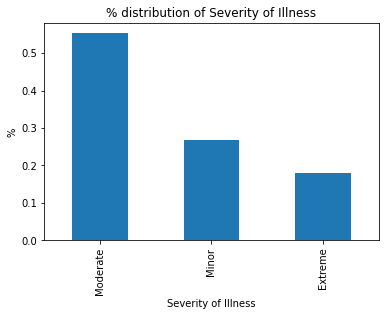

In [32]:
data['Severity of Illness'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Severity of Illness')
plt.ylabel('%')
plt.title('% distribution of Severity of Illness')

Here we can see Moderate has maximum number of patients. Lets check the numerical representation.

In [33]:
data['Severity of Illness'].value_counts(normalize=True)*100

Moderate    55.267326
Minor       26.870899
Extreme     17.861775
Name: Severity of Illness, dtype: float64

We see than number of we have highest number of patients with moderately severe illness, followed by minor illness. There are fewer patients with extreme illness.

Lets check which what is severity of illness for each Age group

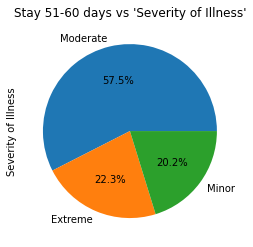

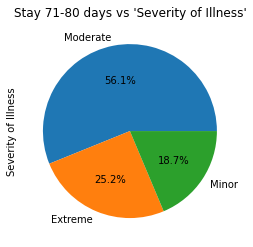

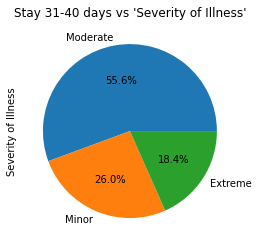

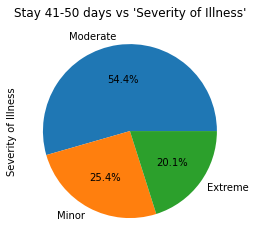

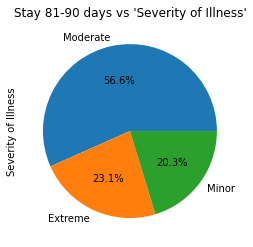

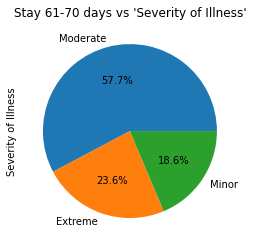

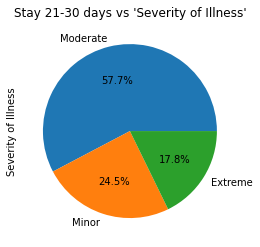

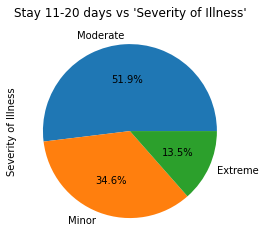

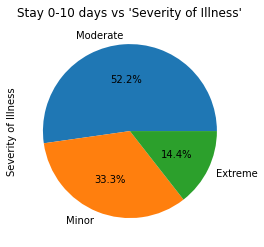

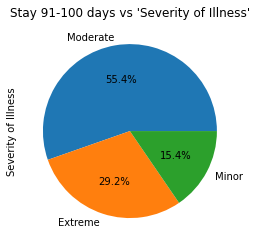

In [34]:
for i in data['Age'].unique():
    data[data['Stay']==i]['Severity of Illness'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')
    plt.title("Stay {} days vs 'Severity of Illness'".format(i))
    plt.show()
    plt.show()

Here we can almost same spread of severity of illness for each age group i. e moderate followed by extreme.

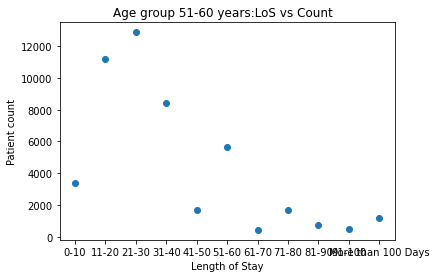

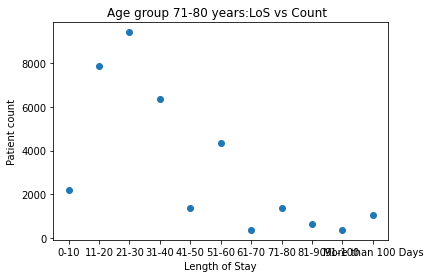

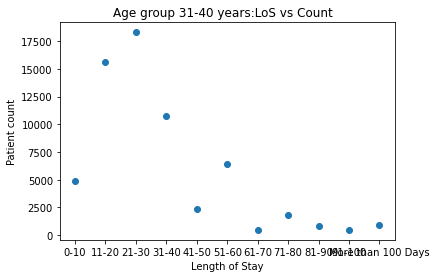

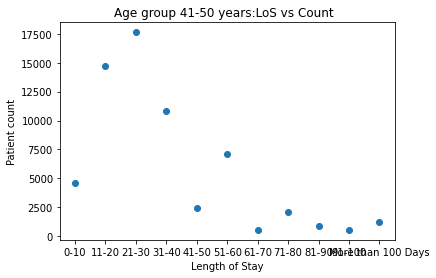

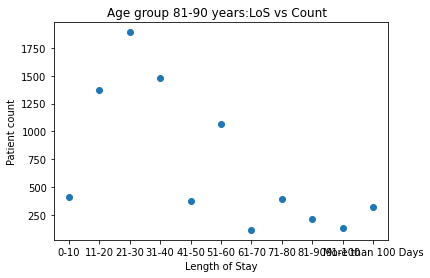

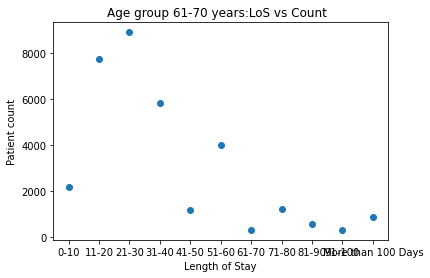

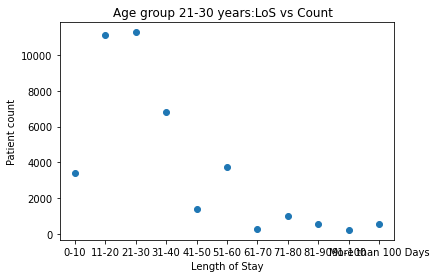

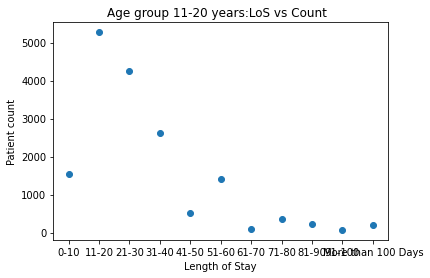

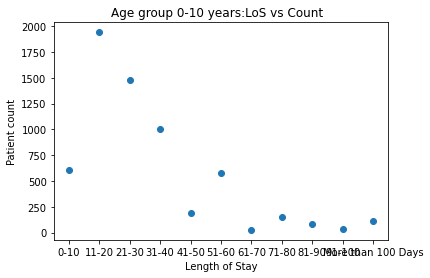

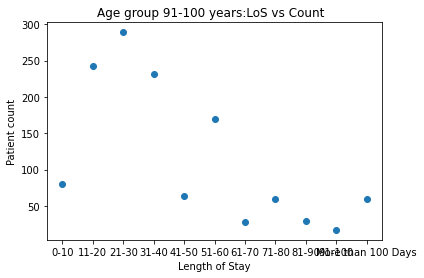

In [35]:
for i in data['Age'].unique():
    #sns.scatterplot(data[data['Age']==i]['Stay'].value_counts(),data['Stay'].unique())
    df=pd.crosstab(data['Age']==i,data['Stay'])
    plt.scatter(df.columns,df.iloc[1])
    plt.xlabel("Length of Stay")
    plt.ylabel("Patient count")
    plt.title("Age group {} years:LoS vs Count  ".format(i))
    plt.show()
    




Here we can check spread of data for each age type.
While the overall number of patients is lower in the age group of 91-100 years, we see the majority Length of stay going upto 60 days.


Text(0.5, 1.0, '% count of patients in each hospital code')

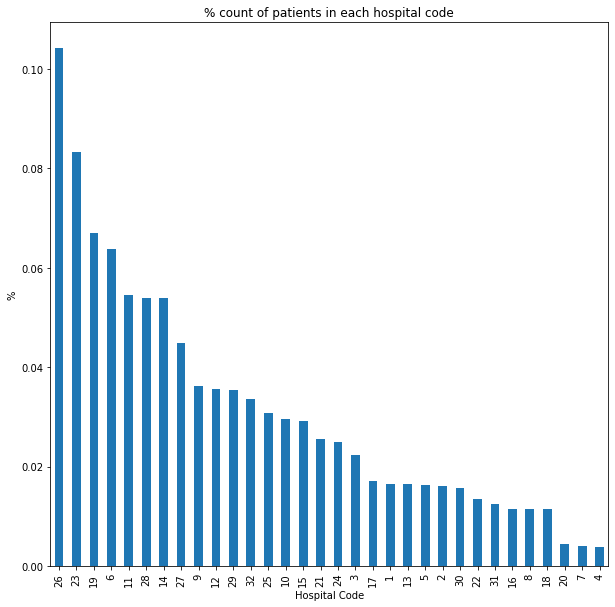

In [36]:
plt.figure(figsize=(10,10))
data['Hospital_code'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Hospital Code')
plt.ylabel('%')
plt.title('% count of patients in each hospital code')

Here we can see the Hospital_code 26 has maximum number of patients.

<Figure size 1080x1080 with 0 Axes>

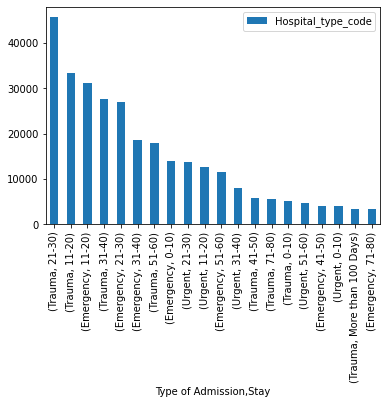

In [37]:
plt.figure(figsize=(15,15))
data[['Type of Admission',"Stay","Hospital_type_code"]].groupby(['Type of Admission',"Stay"]).count().sort_values("Hospital_type_code",ascending=False).head(20).plot(kind="bar")

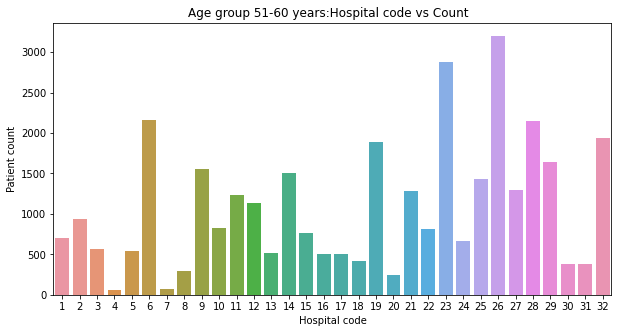

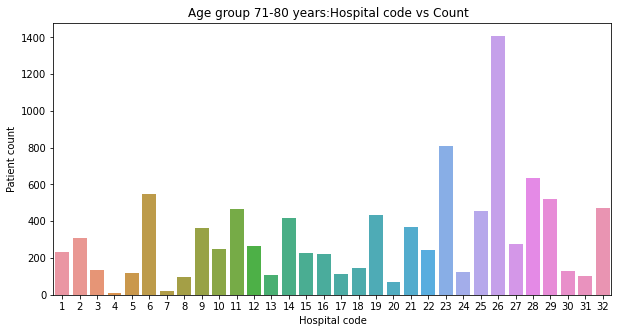

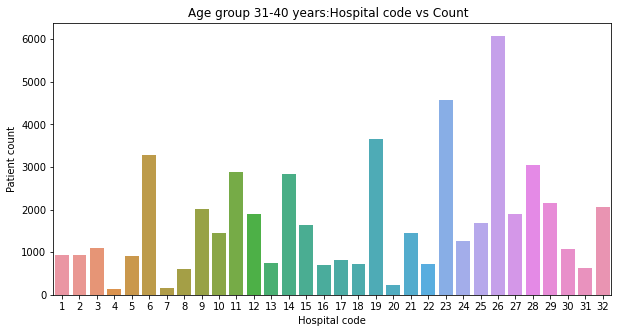

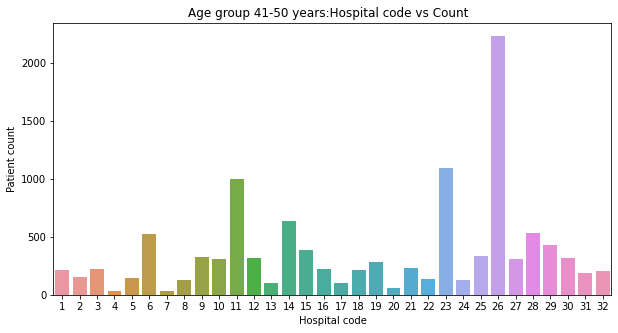

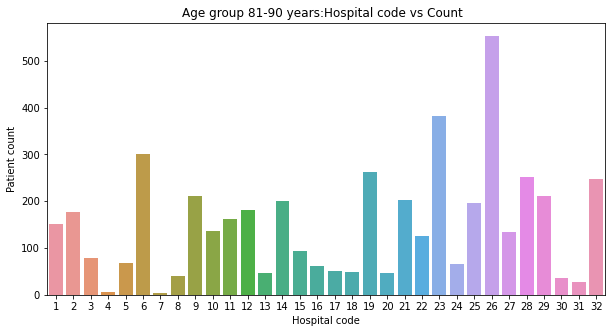

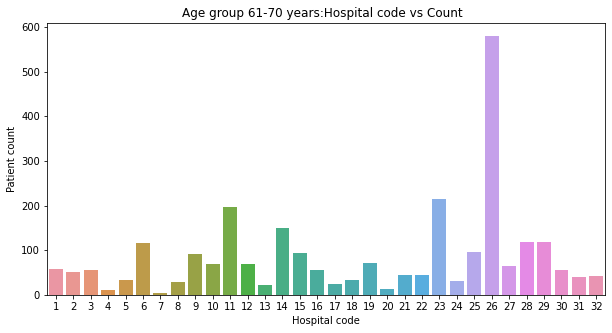

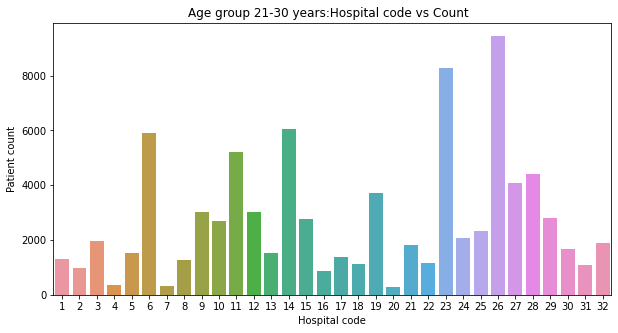

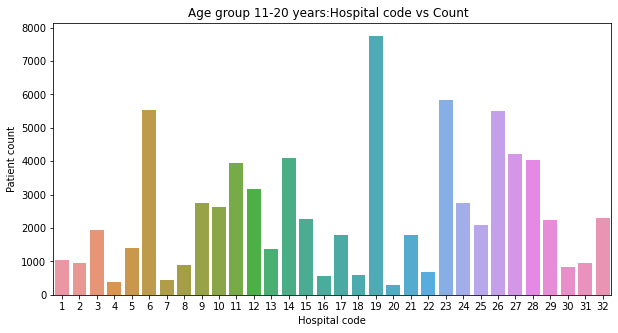

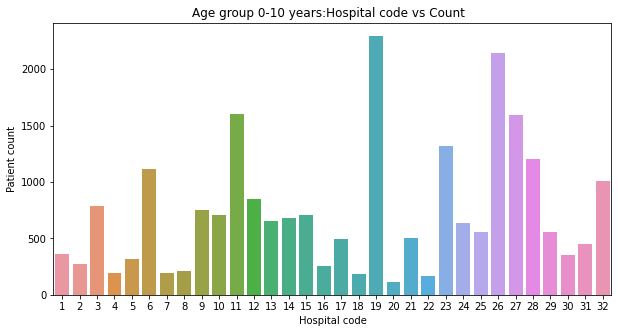

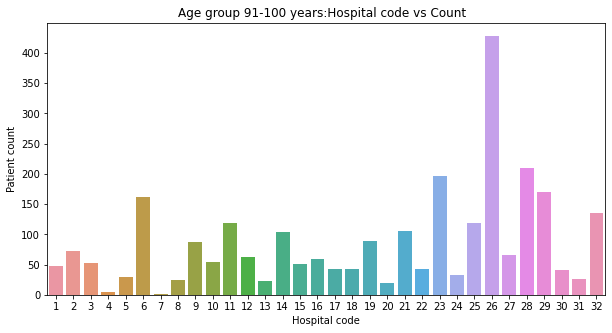

In [38]:
for i in data['Age'].unique():
    plt.figure(figsize=(10,5))
    sns.countplot(data.groupby('Stay').get_group(i)['Hospital_code'])
    plt.ylabel("Patient count")
    plt.xlabel("Hospital code")
    plt.title("Age group {} years:Hospital code vs Count  ".format(i))

Here we can see the count of patients for each age group with the hospital_code.
Here we clearly infere that maximum count of patients with all age group are admitted in hospital_code 26.

In [39]:
#Encoding stay colunm to numerical values for better under standing.

In [40]:
data['Stay'].str.strip()
data['Stay']=data['Stay'].replace({'0-10':1,'11-20':2,'21-30':3,'31-40':4,'41-50':5,'51-60':6,'61-70':7,'71-80':8,'81-90':9,'91-100':10,'More than 100 Days':11})
data['Stay'].value_counts()

3     86316
2     77095
4     54312
6     34463
1     23250
5     11541
8     10096
11     6548
9      4761
10     2713
7      2698
Name: Stay, dtype: int64

In [41]:
def plot_los_groupby(variable, size=(7,4)):
   
    results = data[[variable, 'Stay']].groupby(variable).mean().reset_index()
    values = list(results['Stay'].values)
    labels = list(results[variable].values)

    fig, ax = plt.subplots(figsize=size)
    ind = range(len(results))
    ax.barh(ind, values, align='center', height=0.6, color = '#55a868', alpha=0.8)
    ax.set_yticks(ind)
    ax.set_yticklabels(labels)
    ax.set_xlabel('Average Length of Stay (days)')
    ax.tick_params(left=False, top=False, right=False) 
    ax.set_title('Comparison of {} labels'.format(variable))
    
    plt.tight_layout()
    plt.show();

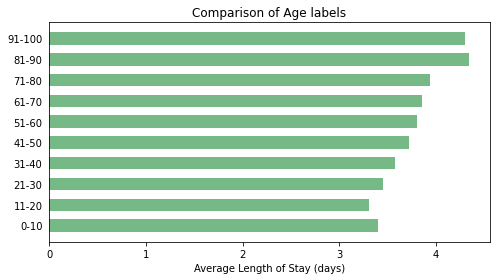

In [42]:
plot_los_groupby('Age')

Here we can infere that 81 to 100 had lenth of stay is  31 to 40.

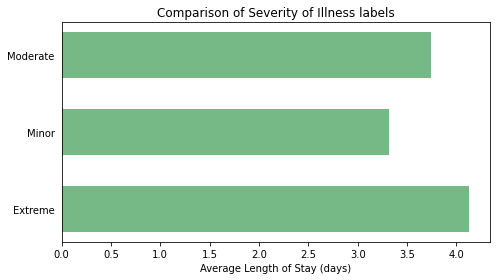

In [43]:
plot_los_groupby('Severity of Illness')

The median length of stay for Extreme is 31 to 40.

The median length of stay for Minor is 25 to 30.

The median length of stay for Moderate is 25 to 35.

As we can patientid is repeated so we will create new colunm pid

In [44]:
id1={}
li=[]
for i in data['patientid']:
    if i in id1.keys():
        id1[i]=id1.get(i)+1
        
    if i not in id1.keys():
        d={i:0}
        id1.update(d)
for j in data['patientid']:
    if j in id1.keys():
        li.append(id1.get(j))
data['pid']=li
data.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,pid
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,1,13
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,5,13
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,4,13
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,5,13
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,5,13


In [45]:
k=data[['patientid','pid']]
k=k.drop_duplicates()

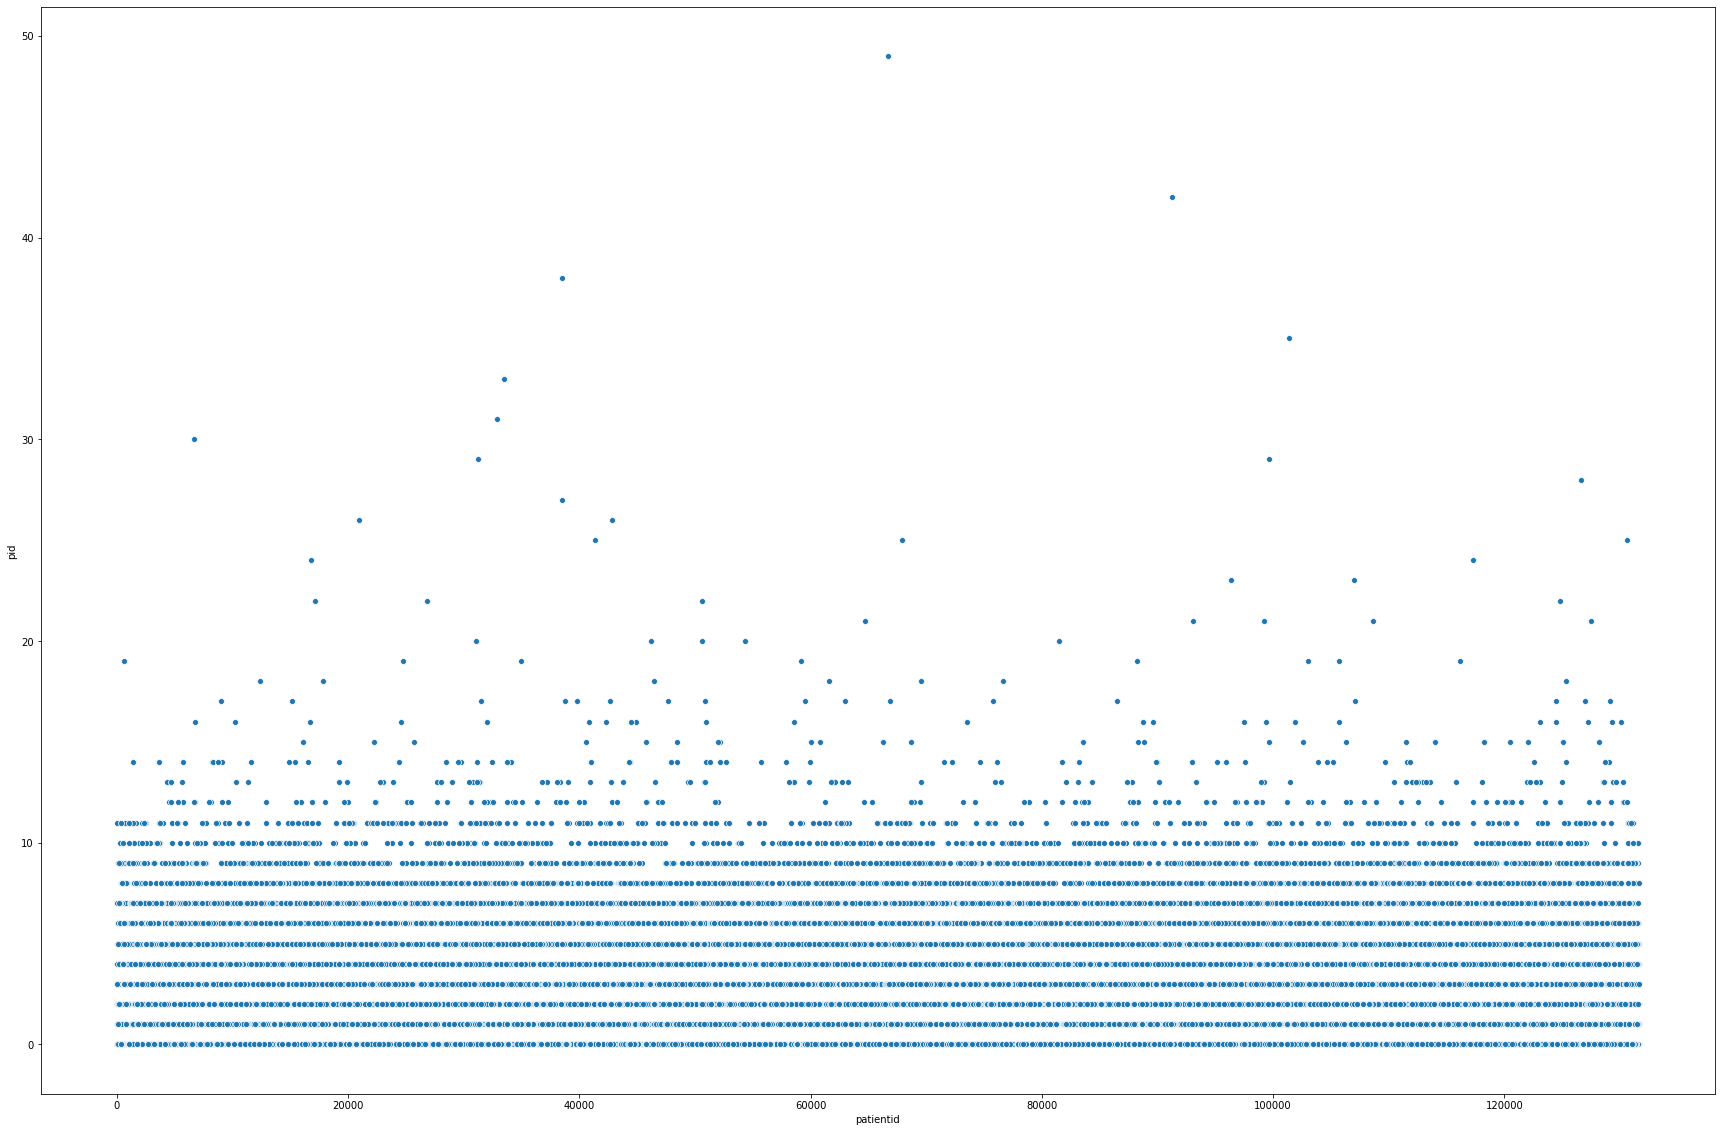

In [46]:
plt.figure(figsize=(30,20))
sns.scatterplot(k['patientid'],k['pid'])

This is the represantation of patients who admitted repeatedly.

In [47]:
patients_notrpeated=data[data['pid']==0]
patients_notrpeated['patientid'].nunique()

19811

19811 is count patients who admitted in hospital for one time.

In [48]:
round(patients_notrpeated['Stay'].mean(),2)

3.81

The length of stay for non repeated patients is between 30-40.

In [49]:
patients_repeated=data[data['pid']!=0]
patients_repeated['patientid'].nunique()

70533

70533 is count of patients admitted for more than one time.

In [50]:
round(patients_repeated['Stay'].mean(),2)

3.69

The length of stay for repeated patients is also between 30-40.

Here we can do chi square test for categorical variables.

Here we will check which variables are effecting the Stay colunm.

In [51]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [52]:
for i in data.columns:
    print(i)
    table=pd.crosstab(data['Stay'],data[i])
    stat, p, dof, expected = chi2_contingency(table)
    #print('dof=%d' % dof)
    #print(expected)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    print('--------------------------------------------------------------------------')

Hospital_code
probability=0.950, critical=352.062, stat=17782.303
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
--------------------------------------------------------------------------
Hospital_type_code
probability=0.950, critical=79.082, stat=5490.977
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
--------------------------------------------------------------------------
City_Code_Hospital
probability=0.950, critical=124.342, stat=8397.299
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
--------------------------------------------------------------------------
Hospital_region_code
probability=0.950, critical=31.410, stat=1216.970
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
--------------------------------------------------------------------------
Available Extra Rooms in Hospital
probability=0.950, critical=201.423, stat=8894.624
Dependent (reject H0)
significance=0.050, p=0.000
D

Above we can see above all colunms are making difference for stay colunm.

We can check wheather mean of Admission deposite for severity of illness.For that we can do oneway anova.

In [53]:
data['Admission_Deposit'].value_counts()

4469.0     386
4277.0     369
4624.0     343
4789.0     295
4400.0     280
          ... 
8082.0       1
10206.0      1
9142.0       1
1951.0       1
2065.0       1
Name: Admission_Deposit, Length: 7283, dtype: int64

In [54]:
from scipy.stats import f_oneway

In [55]:
df1=pd.Series(data[data['Severity of Illness']=='Moderate']['Admission_Deposit'])
df2=pd.Series(data[data['Severity of Illness']=='Minor']['Admission_Deposit'])
df3=pd.Series(data[data['Severity of Illness']=='Extreme']['Admission_Deposit'])


In [60]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
stat, p = f_oneway(df1, df2, df3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Significantly different distribution of Admission Deposit across Severity of Illness groups')


stat=1419.460, p=0.000
Significantly different distribution of Admission Deposit across Severity of Illness groups


we got that different severity has different Admission_Deposit

In [57]:
df1=pd.Series(data[data['Type of Admission']=='Trauma']['Admission_Deposit'])
df2=pd.Series(data[data['Type of Admission']=='Emergency']['Admission_Deposit'])
df3=pd.Series(data[data['Type of Admission']=='Urgent']['Admission_Deposit'])


In [59]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
stat, p = f_oneway(df1, df2, df3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Significantly different distribution of Admission Deposit across Type of Admission groups')

stat=1419.460, p=0.000
Significantly different distribution of Admission Deposit across Type of Admission groups


In [55]:
data.groupby('Severity of Illness').mean()['Admission_Deposit']

Severity of Illness
Extreme     4748.493479
Minor       4984.758311
Moderate    4874.993542
Name: Admission_Deposit, dtype: float64

With this we got extreme  takes low admission deposit than moderate and minor.

Lets check which hospital is better with respect to length of stay and Severity of illness.

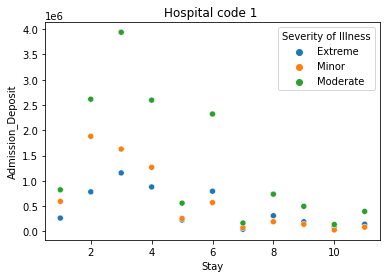

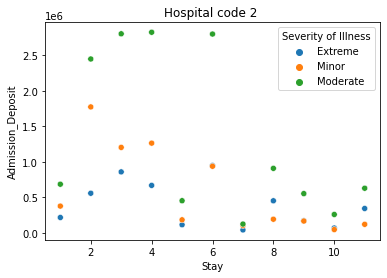

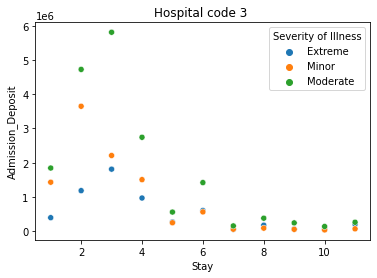

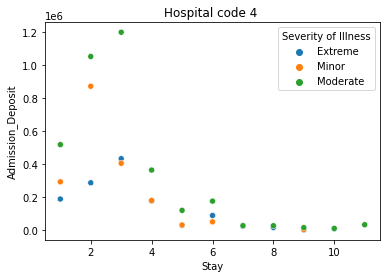

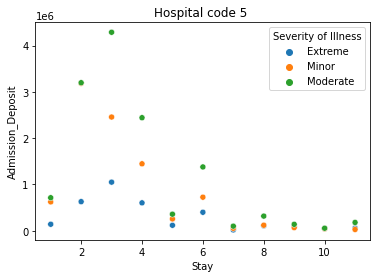

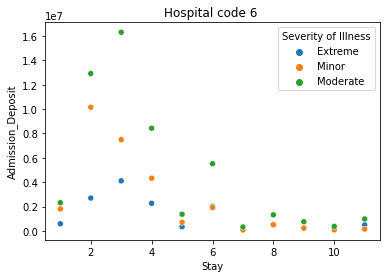

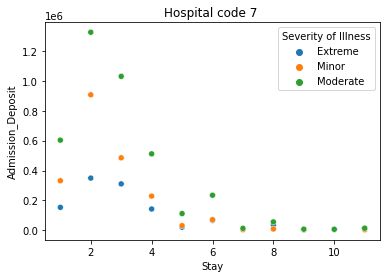

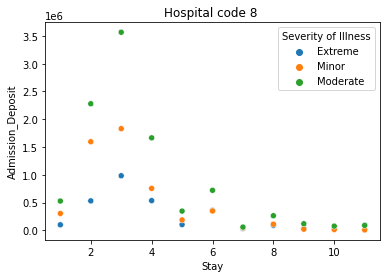

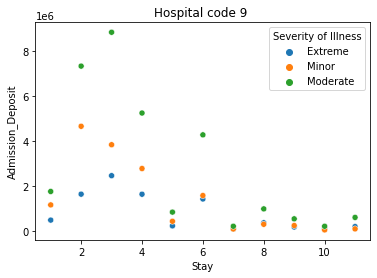

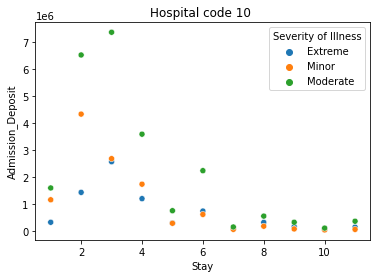

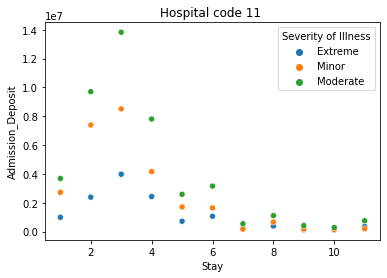

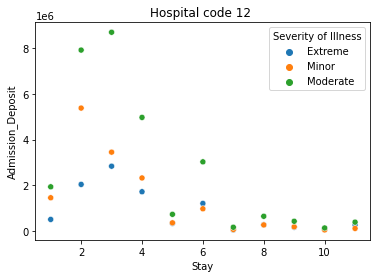

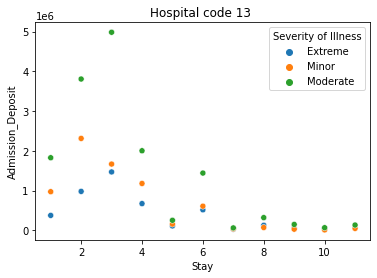

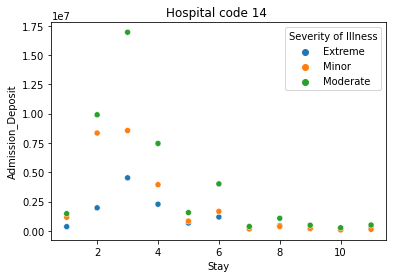

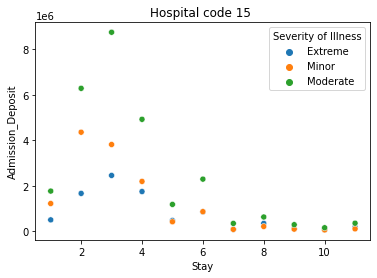

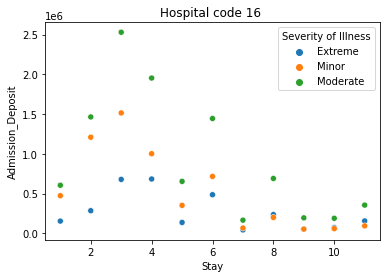

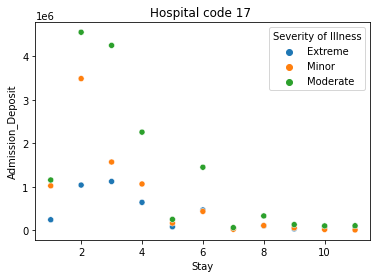

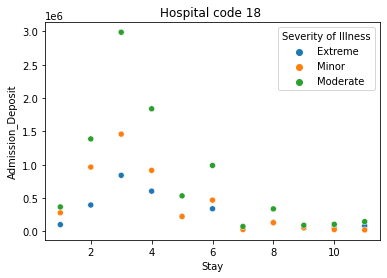

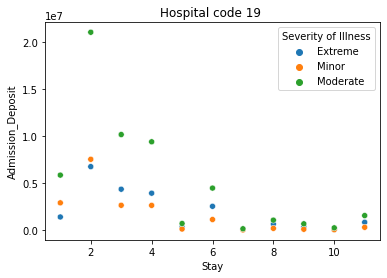

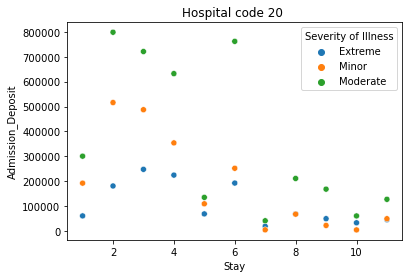

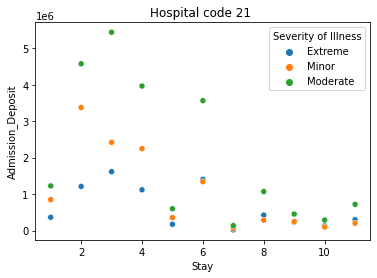

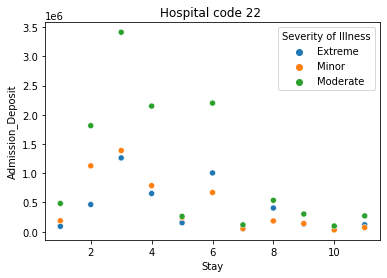

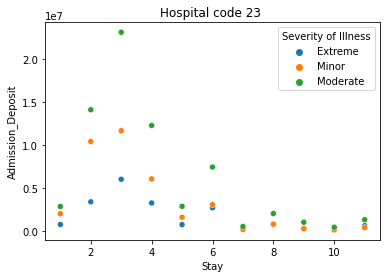

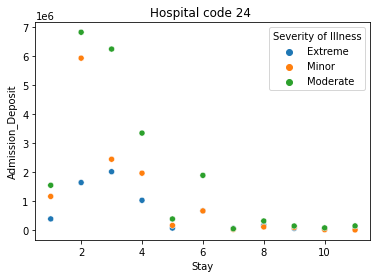

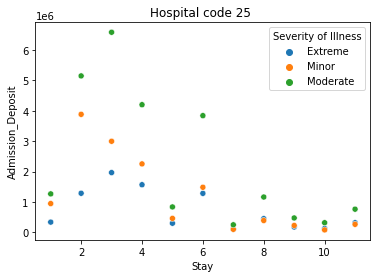

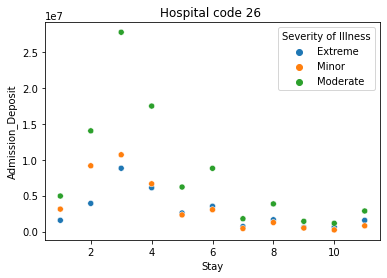

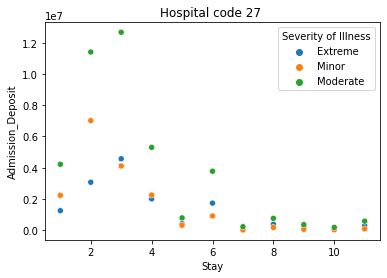

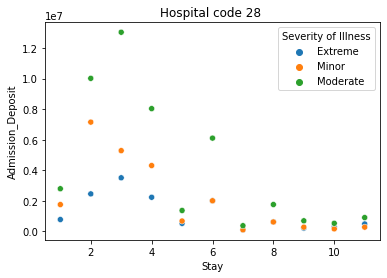

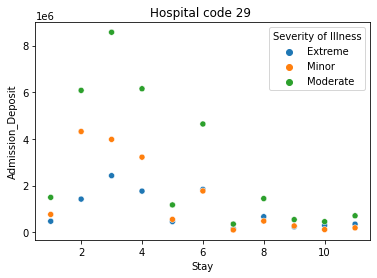

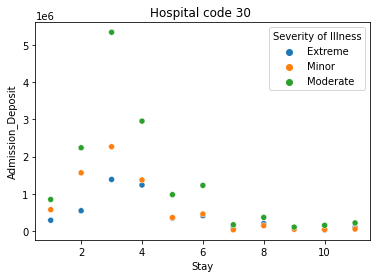

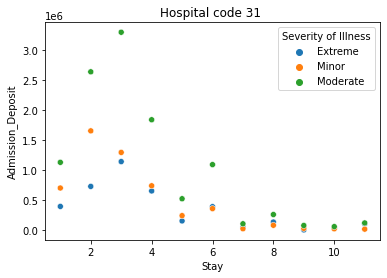

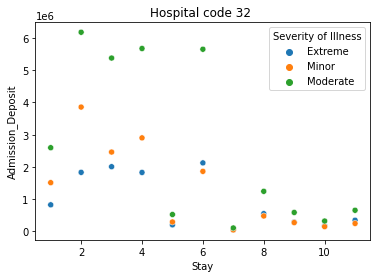

In [56]:
Admission_dept=data.groupby(['Hospital_code','Severity of Illness','Stay']).sum()['Admission_Deposit'].reset_index()
for i in Admission_dept['Hospital_code'].unique():
    A=Admission_dept[Admission_dept['Hospital_code']==i]
    sns.scatterplot(A['Stay'],A['Admission_Deposit'],hue=A['Severity of Illness'])
    plt.title('Hospital code {} '.format(i))
    plt.show()

In above scatter plot we see In lots Hospitals patients with Extreme severity of illness staying for 40 to 60 days.
We can say hospital is better if length of stay for patient with extreme illness is less.
Here in code 1 hospital 2 patients with extreme illness stayed longer than 80 days and admission deposite was very low.
for hospital code 3 no patient stayed above 80 days with extreme severity.
for hospital code 7 the stay for patients with extreme illness is only 50 days.Likewise we can check for all hospital code.
Scatter plot shows that Admission Deposite is not dependant on the severity of illness for any hospital.

In [57]:
Hospital_region=pd.DataFrame(data.groupby(['Hospital_region_code','Hospital_code']).count()['Stay'])
Hospital_region

Stay
Hospital_region_code Hospital_code       
X                    4               1216
                     5               5143
                     6              20016
                     7               1269
                     10              9271
                     14             16917
                     17              5373
                     23             26112
                     24              7835
                     25              9642
                     28             16947
                     29             11092
Y                    1               5188
                     11             17107
                     12             11149
                     18              3592
                     19             21035
                     20              1390
                     22              4237
                     26             32681
                     27             14109
                     32             10561
Z                    2               5050
                     3               7030
                     8               3611
                     9              11381
                     13              5178
                     15              9134
                     16              3631
                     21              8047
                     30              4917
                     31              3932

There only 3 regions X,Y,Z. X has maximum number of hospitals.

Bed grade:

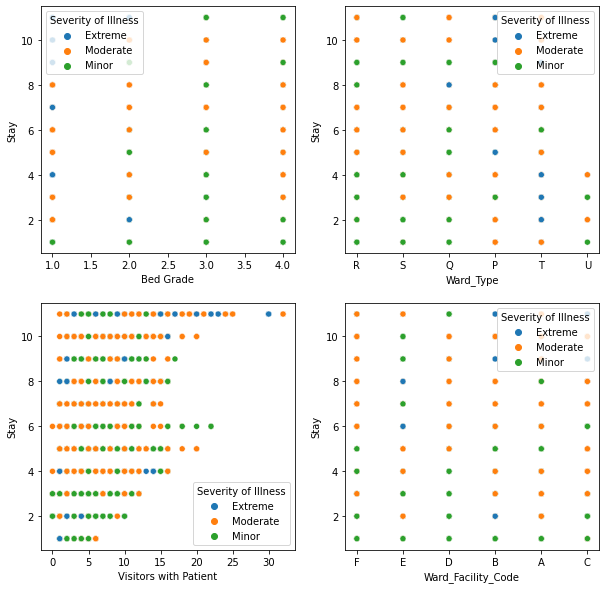

In [58]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))

sns.scatterplot(data['Bed Grade'],data['Stay'],hue=data['Severity of Illness'],ax=axs[0,0])
sns.scatterplot(data['Ward_Type'],data['Stay'],hue=data['Severity of Illness'],ax=axs[0,1])

sns.scatterplot(data['Visitors with Patient'],data['Stay'],hue=data['Severity of Illness'],ax=axs[1,0])
sns.scatterplot(data['Ward_Facility_Code'],data['Stay'],hue=data['Severity of Illness'],ax=axs[1,1])

plt.show()

Bed grade 4 is mostly assigned to patients with moderate and minor illness while bed grade 1 is mostly assigned to patient with 
Extreme illness.

Ward R,S,Q never been assigned to patient with extreme illness.

The patients who stayed long time for them visitors count is greater.

Ward facility F never been assigned to patient with extreme illness.

# Modelling

Implementing random forest without hyper parameter tunning:

In [160]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [161]:
k1=data[['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',  #label enconding of categorical data
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness',
       'Age']]
k1=k1.apply(le.fit_transform)
k1.head()

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age
0,2,2,3,2,5,0,0,5
1,2,2,3,3,5,1,0,5
2,4,0,1,3,4,1,0,5
3,1,1,3,2,3,1,0,5
4,1,1,3,3,3,1,0,5


In [162]:
p1=data.drop(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness',
       'Age'],axis=1)
p1.head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit,Stay
0,8,3,3,2.0,31397,7.0,2,4911.0,0-10
1,2,5,2,2.0,31397,7.0,2,5954.0,41-50
2,10,1,2,2.0,31397,7.0,2,4745.0,31-40
3,26,2,2,2.0,31397,7.0,2,7272.0,41-50
4,26,2,2,2.0,31397,7.0,2,5558.0,41-50


In [163]:
d=pd.concat([p1,k1],axis=1)  #dataset to build model
d.head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit,Stay,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age
0,8,3,3,2.0,31397,7.0,2,4911.0,0-10,2,2,3,2,5,0,0,5
1,2,5,2,2.0,31397,7.0,2,5954.0,41-50,2,2,3,3,5,1,0,5
2,10,1,2,2.0,31397,7.0,2,4745.0,31-40,4,0,1,3,4,1,0,5
3,26,2,2,2.0,31397,7.0,2,7272.0,41-50,1,1,3,2,3,1,0,5
4,26,2,2,2.0,31397,7.0,2,5558.0,41-50,1,1,3,3,3,1,0,5


In [164]:
d.columns

Index(['Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid',
       'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit',
       'Stay', 'Hospital_type_code', 'Hospital_region_code', 'Department',
       'Ward_Type', 'Ward_Facility_Code', 'Type of Admission',
       'Severity of Illness', 'Age'],
      dtype='object')

# Feature selection with RFE

In [65]:
import statsmodels.api as sm
import scipy.stats as st
from statsmodels.tools import add_constant as add_constant
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report
from sklearn.linear_model import LogisticRegression

In [66]:
y=d['Stay']    #Stay dependant colunm
x=d.drop('Stay',axis=1)    # Independant variables(input variables)
from sklearn.preprocessing import StandardScaler   #Scalling data
from sklearn.ensemble import RandomForestClassifier
cv=StandardScaler()
x=cv.fit_transform(x)                                  
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3, random_state=42)  


In [67]:
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 10)
fit = rfe.fit(xtrain,ytrain)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [ True  True  True  True False False  True  True  True False False False
  True False  True False  True]
Feature Ranking: [1 1 1 1 8 7 1 1 1 6 2 4 1 3 1 5 1]


In [68]:
col=d.drop('Stay',axis=1)
col=list(col.columns)
li=[]
li2=list(fit.support_)
for i in range(0,len(col)):
    if li2[i]==True:
        li.append(col[i])
li

['Hospital_code',
 'City_Code_Hospital',
 'Available Extra Rooms in Hospital',
 'Bed Grade',
 'Visitors with Patient',
 'Admission_Deposit',
 'pid',
 'Ward_Type',
 'Type of Admission',
 'Age']

These are features selected by RFE

# BASE MODEL : Random Forest

In [165]:
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report
from sklearn.model_selection import train_test_split

In [166]:
y=d['Stay']    #Stay dependant colunm
x=d.drop('Stay',axis=1)    # Independant variables(input variables)
from sklearn.preprocessing import StandardScaler   #Scalling data
from sklearn.ensemble import RandomForestClassifier
cv=StandardScaler()
x=cv.fit_transform(x)                                  
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3, random_state=42)   #splitting data in test train

RF=RandomForestClassifier(random_state=0)   # Random forest for classification
mod=RF.fit(xtrain,ytrain)                   
ypred=mod.predict(xtest)
accuracy_score(ytest,ypred)                 #checking accuracy of data

0.40413010686439055

In [167]:
print(classification_report(ytest,ypred))

                    precision    recall  f1-score   support

              0-10       0.35      0.18      0.24      7029
             11-20       0.40      0.47      0.43     23158
             21-30       0.42      0.58      0.49     25766
             31-40       0.36      0.26      0.30     16291
             41-50       0.11      0.01      0.02      3478
             51-60       0.42      0.48      0.44     10435
             61-70       0.12      0.01      0.01       835
             71-80       0.36      0.08      0.14      3003
             81-90       0.40      0.23      0.29      1387
            91-100       0.53      0.07      0.12       789
More than 100 Days       0.57      0.48      0.52      1967

          accuracy                           0.40     94138
         macro avg       0.37      0.26      0.27     94138
      weighted avg       0.39      0.40      0.38     94138



The accuracy with random forest is 41%.

Precision: that is  the positive predictive value is between 40 to 60.

Recall: also known as the sensitivity, which is not consistant for each class.

f1-score: this is defined as the weighted harmonic mean of both the precision and recall, where the f1-score at 1 is the best value worst value at 0. it is low for our model. 

support: number of instances that are the correct target values

# Model Building 

for model build we are minimizing the classes of target colunm as accuracy is too low for 11 colunms.

## With 4 classes

In [104]:
df=pd.read_csv("D:/capstone/healthcare/dataset/train_data.csv")

In [105]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [106]:
def stay(x):
    if x in ['0-10','11-20','21-30']:
        return 1
    elif x in ['31-40','41-50','51-60']:
        return 2
    elif x in ['61-70','71-80']:
        return 3
    elif x in ['81-90','91-100','More than 100 Days']:
        return 4
def Age(x):
    if x=="0-10":
        return 1
    elif x=='11-20':
        return 2
    elif x=='21-30':
        return 3
    elif x=='31-40':
        return 4
    elif x=='41-50':
        return 5
    elif x=='51-60':
        return 6
    elif x=="61-70":
        return 7
    elif x=="71-80":
        return 8
    elif x=="81-90":
        return 9
    elif x=="91-100":
        return 10

In [107]:
df.Stay=df["Stay"].apply(lambda x : stay(x))

In [108]:
df.Age=df["Age"].apply(lambda x : Age(x))

In [109]:
df.drop("case_id",1,inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.drop("Bed Grade",1,inplace=True)
df.drop(["City_Code_Patient","Hospital_code"],1,inplace=True)
df.drop(["City_Code_Hospital"],1,inplace=True)
df.drop(['Available Extra Rooms in Hospital',"patientid","Ward_Type","Ward_Facility_Code","Visitors with Patient"],1,inplace=True)


In [110]:
d=dict(zip(list("abcdefgh"),np.arange(8,0,-1)))
df.Hospital_type_code=df.Hospital_type_code.map(d)

In [111]:
df.Hospital_region_code=df.Hospital_region_code.replace({"X":3,"Y":2,"Z":1})

In [112]:
df=pd.get_dummies(df,columns=["Department","Severity of Illness"],drop_first=True)

In [113]:
df["Type of Admission"]=df["Type of Admission"].replace({"Trauma":3,"Emergency":2,"Urgent":1})

In [114]:
df.head(5)

,Hospital_type_code,Hospital_region_code,Type of Admission,Age,Admission_Deposit,Stay,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Severity of Illness_Minor,Severity of Illness_Moderate
0,6,1,2,6,4911.0,1,0,0,1,0,0,0
1,6,1,3,6,5954.0,2,0,0,1,0,0,0
2,4,3,3,6,4745.0,2,1,0,0,0,0,0
3,7,2,3,6,7272.0,2,0,0,1,0,0,0
4,7,2,3,6,5558.0,2,0,0,1,0,0,0


In [115]:
x=df.drop("Stay",1)
y=df.Stay

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=5)

In [39]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier

In [40]:
classifiers = [LogisticRegression(random_state = 0),KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB()]


In [41]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
Basic = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(xtrain, ytrain)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(xtest)
    acc = accuracy_score(ytest, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(xtest)
    ll = log_loss(ytest, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    Basic = Basic.append(log_entry)
    
print("="*30)

LogisticRegression
****Results****
Accuracy: 59.6341%
Log Loss: 0.9353594150249325
KNeighborsClassifier
****Results****
Accuracy: 54.8965%
Log Loss: 4.683488304092659
DecisionTreeClassifier
****Results****
Accuracy: 48.1263%
Log Loss: 17.44646496896831
RandomForestClassifier
****Results****
Accuracy: 49.1367%
Log Loss: 3.2001618069288584
XGBClassifier
****Results****
Accuracy: 60.1048%
Log Loss: 0.9097286726404337
AdaBoostClassifier
****Results****
Accuracy: 59.8763%
Log Loss: 1.3632453131903217
GradientBoostingClassifier
****Results****
Accuracy: 60.1313%
Log Loss: 0.9074786663516496
GaussianNB
****Results****
Accuracy: 59.3833%
Log Loss: 1.0563449509620166


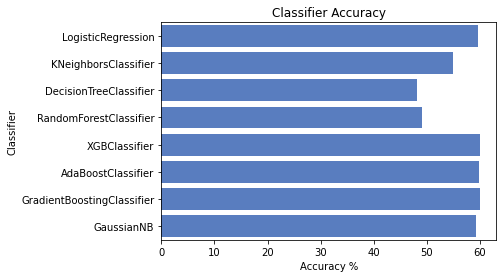

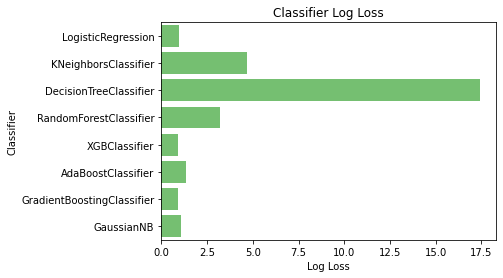

In [43]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=Basic, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=Basic, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

As accuracy is still low we decided to merge stay class into 3 classes.

# 3 stay classes

In [142]:
df=pd.read_csv('D:/capstone/healthcare/dataset/train_data.csv')

In [143]:
def stay(x):
    if x in ['0-10','11-20','21-30','31-40']:
        return 1
    elif x in ['41-50','51-60','61-70']:
        return 2
    else:
        return 3

In [144]:
df.Stay=df["Stay"].apply(lambda x : stay(x))

In [145]:
df["Age"]=df["Age"].apply(lambda x : Age(x))

In [146]:
df.drop("case_id",1,inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.drop("Bed Grade",1,inplace=True)
df.drop(["City_Code_Patient","Hospital_code"],1,inplace=True)
df.drop(["City_Code_Hospital"],1,inplace=True)
df.drop(['Available Extra Rooms in Hospital',"patientid","Ward_Type","Ward_Facility_Code"],1,inplace=True)
df.drop("Visitors with Patient",1,inplace=True)

In [147]:
d=dict(zip(list("abcdefgh"),np.arange(8,0,-1)))
df.Hospital_type_code=df.Hospital_type_code.map(d)

In [148]:
df.Hospital_region_code=df.Hospital_region_code.replace({"X":3,"Y":2,"Z":1})

In [149]:
df=pd.get_dummies(df,columns=["Department","Severity of Illness"],drop_first=True)

In [150]:
df["Type of Admission"]=df["Type of Admission"].replace({"Trauma":3,"Emergency":2,"Urgent":1})

In [151]:
x=df.drop("Stay",1)
y=df.Stay

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=5)

In [152]:
print(xtrain.columns,end="\n\n")
print(y.unique())

Index(['Hospital_type_code', 'Hospital_region_code', 'Type of Admission',
       'Age', 'Admission_Deposit', 'Department_anesthesia',
       'Department_gynecology', 'Department_radiotherapy',
       'Department_surgery', 'Severity of Illness_Minor',
       'Severity of Illness_Moderate'],
      dtype='object')

[1 2 3]


In [132]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
Basic = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(xtrain, ytrain)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(xtest)
    acc = accuracy_score(ytest, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(xtest)
    ll = log_loss(ytest, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    Basic = Basic.append(log_entry)
    
print("="*30)

LogisticRegression
****Results****
Accuracy: 76.8835%
Log Loss: 0.6770169746144484
KNeighborsClassifier
****Results****
Accuracy: 74.4441%
Log Loss: 4.148779647787785
DecisionTreeClassifier
****Results****
Accuracy: 63.8075%
Log Loss: 12.346840596441961
RandomForestClassifier
****Results****
Accuracy: 65.6010%
Log Loss: 2.636962270656484
XGBClassifier
****Results****
Accuracy: 76.8208%
Log Loss: 0.6594913478335023
AdaBoostClassifier
****Results****
Accuracy: 76.8771%
Log Loss: 1.079370267292885
GradientBoostingClassifier
****Results****
Accuracy: 76.8835%
Log Loss: 0.6580950004585174
GaussianNB
****Results****
Accuracy: 76.5786%
Log Loss: 0.7828035980875339


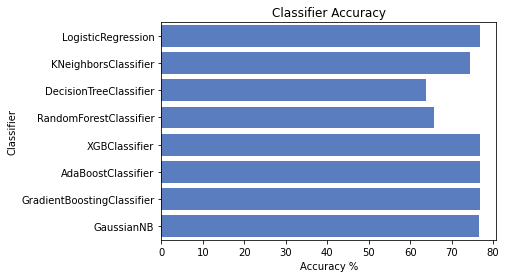

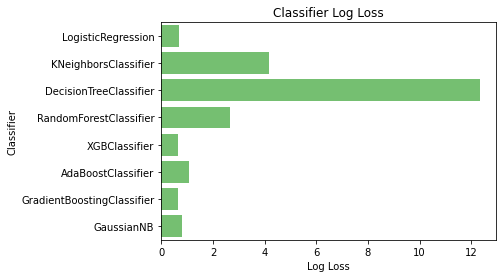

In [133]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=Basic, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=Basic, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [134]:
Basic

,Classifier,Accuracy,Log Loss
0,LogisticRegression,76.883520,0.677017
0,KNeighborsClassifier,74.444055,4.148780
0,DecisionTreeClassifier,63.807520,12.346841
0,RandomForestClassifier,65.600994,2.636962
0,XGBClassifier,76.820833,0.659491
0,AdaBoostClassifier,76.877145,1.079370
0,GradientBoostingClassifier,76.883520,0.658095
0,GaussianNB,76.578587,0.782804


In [135]:
results1=pd.DataFrame(Basic.sort_values(by='Accuracy',ascending=False).reset_index())
results1=results1.drop('index',axis=1)
results1.sort_values(by='Accuracy',ascending=True)

,Classifier,Accuracy,Log Loss
7,DecisionTreeClassifier,63.807520,12.346841
6,RandomForestClassifier,65.600994,2.636962
5,KNeighborsClassifier,74.444055,4.148780
4,GaussianNB,76.578587,0.782804
3,XGBClassifier,76.820833,0.659491
2,AdaBoostClassifier,76.877145,1.079370
0,LogisticRegression,76.883520,0.677017
1,GradientBoostingClassifier,76.883520,0.658095


Here we can see GradientBoostingClassifier has 76% of accuracy and log loss is 0.65 then Logistic regression has 76% accuracy with log loss of 0.67 followed by AdaBoostClassifier and XGBClassifier.

<b>GradientBoostingClassifier</b>

<b>So lets Tune GradientBoostingClassifier:</b>

In [136]:
from sklearn.metrics import classification_report, confusion_matrix

In [137]:
xtrain.shape,xtest.shape
ytrain.value_counts(),ytest.value_counts()

(1    168590
 2     34067
 3     16951
 Name: Stay, dtype: int64,
 1    72362
 2    14617
 3     7140
 Name: Stay, dtype: int64)

In [138]:
from sklearn.preprocessing import MinMaxScaler

In [139]:
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [140]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(xtrain, ytrain)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(xtrain, ytrain)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(xtest, ytest)))

Learning rate:  0.05
Accuracy score (training): 0.768
Accuracy score (validation): 0.769
Learning rate:  0.075
Accuracy score (training): 0.768
Accuracy score (validation): 0.769
Learning rate:  0.1
Accuracy score (training): 0.768
Accuracy score (validation): 0.769
Learning rate:  0.25
Accuracy score (training): 0.768
Accuracy score (validation): 0.769
Learning rate:  0.5
Accuracy score (training): 0.768
Accuracy score (validation): 0.769
Learning rate:  0.75
Accuracy score (training): 0.768
Accuracy score (validation): 0.769
Learning rate:  1
Accuracy score (training): 0.768
Accuracy score (validation): 0.769


In [102]:
##Accuracy same for all learning rate.

In [141]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(xtrain, ytrain)
predictions = gb_clf2.predict(xtest)

print("Confusion Matrix:")
print(confusion_matrix(ytest, predictions))

print("Classification Report")
print(classification_report(ytest, predictions))

Confusion Matrix:
[[72354     1     7]
 [14610     4     3]
 [ 7130     4     6]]
Classification Report
              precision    recall  f1-score   support

           1       0.77      1.00      0.87     72362
           2       0.44      0.00      0.00     14617
           3       0.38      0.00      0.00      7140

    accuracy                           0.77     94119
   macro avg       0.53      0.33      0.29     94119
weighted avg       0.69      0.77      0.67     94119



<b>Logistic Regression</b>

In [153]:
xtrain.shape,ytrain.shape

((219608, 11), (219608,))

In [154]:
ytrain.value_counts(),ytest.value_counts()

(1    168590
 2     34067
 3     16951
 Name: Stay, dtype: int64,
 1    72362
 2    14617
 3     7140
 Name: Stay, dtype: int64)

In [155]:
#Data is imbalanced.

In [158]:
#pip install imblearn

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

In [162]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [165]:
accuracy_score(ytest,ypred)

0.7688351979940289

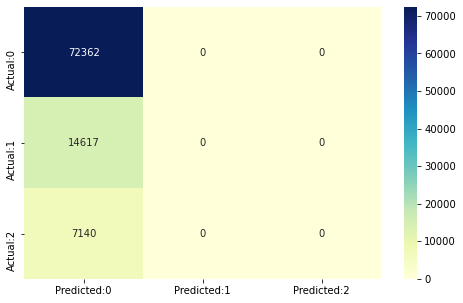

In [172]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

<b>XBG</b>

# Different approach::

In [305]:
data=pd.read_csv('D:/capstone/healthcare/dataset/train_data.csv')  #reading the dataset

In [306]:
data['Stay'].str.strip()
data['Stay']=data['Stay'].replace({'0-10':1,'11-20':1,'21-30':1,'31-40':2,'41-50':2,'51-60':2,'61-70':2,'71-80':3,'81-90':3,'91-100':3,'More than 100 Days':3})
data['Stay'].value_counts()

1    189234
2    104664
3     24540
Name: Stay, dtype: int64

In [307]:
data['Bed Grade'] = np.where(data['Bed Grade'].isna(),2.0,data['Bed Grade'])
data['City_Code_Patient'] = np.where(data['City_Code_Patient'].isna(),8.0,data['City_Code_Patient'])

In [308]:
data = data.drop(['case_id'],axis=1)

In [309]:
data['Bed Grade'] = data['Bed Grade'].astype(object)
data['City_Code_Patient'] = data['City_Code_Patient'].astype(int)
data['Admission_Deposit'] = data['Admission_Deposit'].astype(int)

In [310]:
train = pd.get_dummies(data=data,columns=['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness','Bed Grade',
       'Age'],drop_first=True)

In [311]:
x = train.drop('Stay',axis=1)
y = train['Stay']

In [312]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=101)
print(X_train.shape)
print(X_test.shape)

(191062, 45)
(127376, 45)


In [313]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
Basic = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    Basic = Basic.append(log_entry)
    
print("="*30)

LogisticRegression
****Results****
Accuracy: 59.1830%
Log Loss: 0.8731240487762558
KNeighborsClassifier
****Results****
Accuracy: 54.1625%
Log Loss: 4.153963382595489
DecisionTreeClassifier
****Results****
Accuracy: 62.8148%
Log Loss: 12.843307561431857
RandomForestClassifier
****Results****
Accuracy: 73.7313%
Log Loss: 0.7010569510303333
XGBClassifier
****Results****
Accuracy: 74.3225%
Log Loss: 0.612608402152256
AdaBoostClassifier
****Results****
Accuracy: 71.7992%
Log Loss: 1.073173276343206
GradientBoostingClassifier
****Results****
Accuracy: 73.8852%
Log Loss: 0.6351532603010449
GaussianNB
****Results****
Accuracy: 65.2847%
Log Loss: 0.7513216353419229


XGB has good accuracy

In [260]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [261]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [262]:
score = xgb_clf.score(X_test,y_test)
print(score)

0.7432169325461625


74% accuracy

In [264]:
ypred=xgb_clf.predict(X_test)

In [266]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           1       0.76      0.95      0.84     75385
           2       0.69      0.47      0.56     42100
           3       0.71      0.34      0.46      9891

    accuracy                           0.74    127376
   macro avg       0.72      0.59      0.62    127376
weighted avg       0.73      0.74      0.72    127376



In [249]:
##tunning XGBclassifier

In [270]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [314]:
n_estimators = range(50, 300, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgb_clf, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

In [228]:
###GradientBoostingClassifier with hyper parameter tunning...

In [229]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.596
Accuracy score (validation): 0.592
Learning rate:  0.075
Accuracy score (training): 0.596
Accuracy score (validation): 0.592
Learning rate:  0.1
Accuracy score (training): 0.598
Accuracy score (validation): 0.594
Learning rate:  0.25
Accuracy score (training): 0.689
Accuracy score (validation): 0.688
Learning rate:  0.5
Accuracy score (training): 0.718
Accuracy score (validation): 0.716
Learning rate:  0.75
Accuracy score (training): 0.721
Accuracy score (validation): 0.719
Learning rate:  1
Accuracy score (training): 0.721
Accuracy score (validation): 0.718


Learning rate is 0.5 is good 

In [227]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[71146  4040   199]
 [23678 17132  1290]
 [ 2028  4963  2900]]
Classification Report
              precision    recall  f1-score   support

           1       0.73      0.94      0.83     75385
           2       0.66      0.41      0.50     42100
           3       0.66      0.29      0.41      9891

    accuracy                           0.72    127376
   macro avg       0.68      0.55      0.58    127376
weighted avg       0.70      0.72      0.69    127376



In [230]:
##better

#### Decision tree

In [243]:
DecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)

DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [244]:
Pred = DecisionTree.predict(X_test)

In [245]:
print('Accuracy Score: ',accuracy_score(y_test, giniPred))

Accuracy Score:  0.7227028639618138


In [246]:
print('Classification Report')
print(classification_report(y_test, giniPred))

Classification Report
              precision    recall  f1-score   support

           1       0.74      0.95      0.83     75385
           2       0.65      0.45      0.53     42100
           3       0.71      0.20      0.31      9891

    accuracy                           0.72    127376
   macro avg       0.70      0.53      0.56    127376
weighted avg       0.71      0.72      0.69    127376



In [250]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint 
  
# Creating the hyperparameter grid  
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
  
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier() 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 
  
tree_cv.fit(X_train,y_train ) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 8}
Best score is 0.7044310389425782


In [283]:
tree = DecisionTreeClassifier(criterion= 'entropy',max_depth= None, max_features= 7, min_samples_leaf=8)
tree.fit(X_train,y_train ) 
ypred=tree.predict(X_test)

In [285]:
accuracy_score(y_test,ypred)

0.6892428714985555

In [286]:
#reduced

In [267]:
##Random Forest

In [300]:
model =  RandomForestClassifier(n_estimators = 100,random_state = 42)

# fitting the model
model.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [301]:
ypred=model.predict(X_test)

In [302]:
accuracy_score(y_test,ypred)

0.7369441653058662

In [304]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           1       0.77      0.92      0.84     75385
           2       0.66      0.50      0.57     42100
           3       0.71      0.32      0.44      9891

    accuracy                           0.74    127376
   macro avg       0.71      0.58      0.62    127376
weighted avg       0.73      0.74      0.72    127376



In [276]:
##Tunning RF

In [292]:
import time
import random
np.random.seed(42)

#param_dist = {'max_depth': [2, 3, 4],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}
param_dist = {'max_depth': [2, 3, 4],'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(model, cv = 3,param_grid=param_dist, n_jobs = 3)

cv_rf.fit(X_train,y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 4}
Time taken in grid search:  57.15


In [293]:
model =  RandomForestClassifier(n_estimators = 100,criterion='entropy',max_depth=4,random_state = 42)

In [294]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, random_state=42)

In [295]:
ypred=model.predict(X_test)

In [296]:
accuracy_score(y_test,ypred)

0.6538044843612612

In [297]:
confusion_matrix(y_test,ypred)

array([[73752,  1633,     0],
       [32573,  9527,     0],
       [ 4806,  5085,     0]], dtype=int64)

In [299]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           1       0.66      0.98      0.79     75385
           2       0.59      0.23      0.33     42100
           3       0.00      0.00      0.00      9891

    accuracy                           0.65    127376
   macro avg       0.42      0.40      0.37    127376
weighted avg       0.59      0.65      0.58    127376



# Future Scope

Here we can see the 'Stay' colunm is dependant variables.

Hyper parameter tunning for random forest. 

As 'Stay' colunm is categorical variable so we can use classification algorithms.for example
Logistic regression, Random Forest, Decision Tree,Support Vector Machine,K-Nearest Neighbours,
Naïve Bayes, ensembling machine learning models.

For better results we will use Cross validation,Hyper parameter tunning.

Al so we can use clustering for better understanding of data.Then we can classify data accordingly.
